In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
import nltk

In [3]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to C:\Users\ALPER
[nltk_data]     2021\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\ALPER
[nltk_data]     2021\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
!pip install TextBlob

In [6]:
pip install langdetect

Note: you may need to restart the kernel to use updated packages.


In [7]:
!pip install wordcloud

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [9]:
df=pd.read_csv("restaurant.csv")

In [10]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


In [11]:
df["stars"].value_counts()

5    4247
4    2636
3    1561
1    1056
2     917
Name: stars, dtype: int64

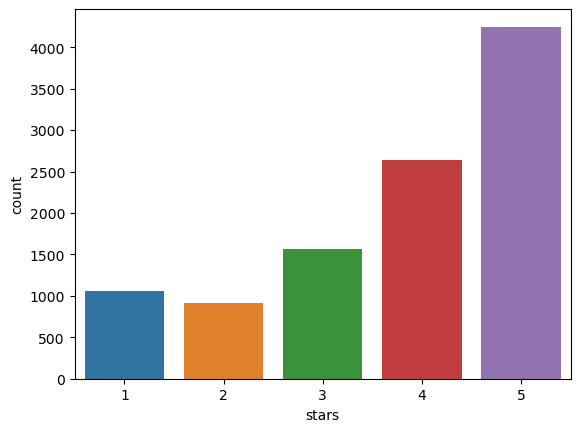

In [12]:
sns.countplot(x=df["stars"]);

In [13]:
df['year'] = pd.DatetimeIndex(df['date']).year
df2 = pd.DataFrame(df.groupby('year').stars.mean())

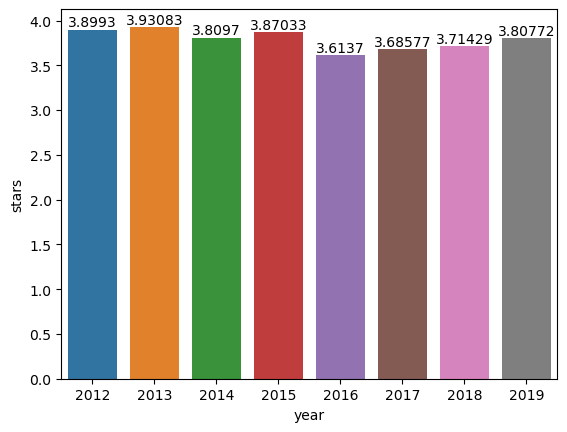

In [14]:
ax=sns.barplot(df2.index, df2.stars)
ax.bar_label(ax.containers[0]);

In [15]:
df['text']=df['text'].str.lower() 
df['text']=df['text'].str.replace('[^\w\s]','') 
df['text']=df['text'].str.replace('\d+','')  
df['text']=df['text'].str.replace('\n','').replace('\r',"")

In [16]:
def situation(x):
    if x < 3:
        return 'negative'
    elif x == 3:
        return 'neutral'
    else:
        return 'positive'

In [17]:
df['situation'] = df['stars'].map(situation)

In [18]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year,situation
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,after getting food poisoning at the palms hote...,2012-12-04 03:10:18,2012,positive
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,a feast worthy of godsbaccarnal buffet in caes...,2014-01-17 00:50:50,2014,positive
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,the crab legs are better than the ones at wick...,2015-06-08 18:03:09,2015,positive
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,not worth it too salty food and expensive this...,2016-12-19 16:15:29,2016,negative
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,i would give this infinite stars if i could my...,2015-07-28 07:13:17,2015,positive


In [19]:
df2=df[['text','stars','situation']]

In [20]:
df2.head()

,text,stars,situation
0,after getting food poisoning at the palms hote...,5,positive
1,a feast worthy of godsbaccarnal buffet in caes...,4,positive
2,the crab legs are better than the ones at wick...,4,positive
3,not worth it too salty food and expensive this...,1,negative
4,i would give this infinite stars if i could my...,5,positive


In [21]:
df["situation"].value_counts()

positive    6883
negative    1973
neutral     1561
Name: situation, dtype: int64

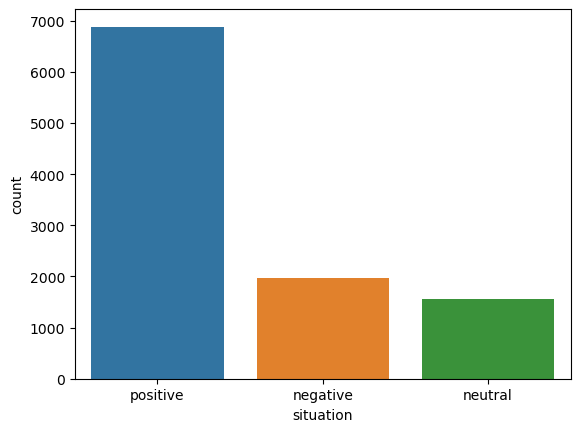

In [22]:
sns.countplot(x=df["situation"]);

In [23]:
from langdetect import detect
df['language']=df['text'].apply(detect)

In [24]:
df.language.value_counts()

en       10374
es          10
ja           7
zh-cn        6
ko           6
de           4
fr           4
da           2
sw           1
pt           1
sk           1
zh-tw        1
Name: language, dtype: int64

In [25]:
df=df[df['language']=='en']

In [26]:
df.sample(5)

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year,situation,language
5246,2765366,mpcLFoKNOkLy2JJ_Gb5o1A,rphfuJb7OKdHXnAvYfsmAw,RESDUcs7fIiihp38-d6_6g,5,0,0,0,the best buffet ive ever been to tbh my family...,2015-07-15 06:44:22,2015,positive,en
8073,3001609,WhkLcCiJU4eue70Pu6a7zQ,FXEaoCqWF9bS5uXW4da81Q,RESDUcs7fIiihp38-d6_6g,3,1,0,0,been here several times and it seems like the ...,2019-08-10 18:41:49,2019,neutral,en
7530,2952465,uuktPOg5wR4Hi2aQ4tAJUA,aHkn3tnOEyA1grHpcDZEew,RESDUcs7fIiihp38-d6_6g,5,1,0,0,we love this buffet and we come here every tim...,2018-04-14 20:13:06,2018,positive,en
3545,2637112,73hwhnkk5gKkq7_0-flRpg,HZNJX9PCsI7iiA_yUG28Hw,RESDUcs7fIiihp38-d6_6g,2,0,0,0,maybe it was the too much hype but i was prett...,2016-05-11 05:52:07,2016,negative,en
5059,2753274,ay6wXFQ5jddmav3bg93jSg,7ZMRl_YczM7epHBALHaXeQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,best buffet in vegas go for all you can drink ...,2015-10-16 03:46:30,2015,positive,en


In [27]:
from textblob import TextBlob

In [28]:
df[["polarity","subjectivity"]]=df["text"].apply(lambda t:pd.Series(TextBlob(t).sentiment))

In [29]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year,situation,language,polarity,subjectivity
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,after getting food poisoning at the palms hote...,2012-12-04 03:10:18,2012,positive,en,0.337330,0.586926
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,a feast worthy of godsbaccarnal buffet in caes...,2014-01-17 00:50:50,2014,positive,en,0.219409,0.537292
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,the crab legs are better than the ones at wick...,2015-06-08 18:03:09,2015,positive,en,-0.134722,0.731944
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,not worth it too salty food and expensive this...,2016-12-19 16:15:29,2016,negative,en,-0.325000,0.400000
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,i would give this infinite stars if i could my...,2015-07-28 07:13:17,2015,positive,en,0.362500,0.725000


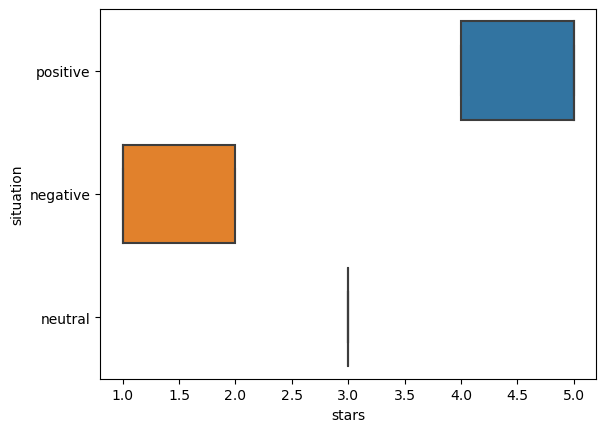

In [30]:
sns.boxplot(y='situation',x='stars',data=df);

In [31]:
x=df.text 
y=df.situation

In [32]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [33]:
vect=CountVectorizer(lowercase=True, stop_words="english", ngram_range=(1,1))


In [34]:
x=vect.fit_transform(x)

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [37]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [38]:
mb=MultinomialNB()
tahmin=mb.fit(x_train,y_train).predict(x_test)

In [39]:
accuracy_score(tahmin,y_test)

0.7729375481881264

In [40]:
d=DecisionTreeClassifier()
d.fit(x_train,y_train)
tahmin2=d.fit(x_train,y_train).predict(x_test)

In [41]:
accuracy_score(tahmin2,y_test)

0.6827293754818813

In [42]:
#en yükseğü confisiun matrix de göster

In [43]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image
import numpy as np

In [44]:
def wc(text):
    plt.figure(figsize=(8,8))
    mask=np.array(Image.open("cloud.png")) 
    wc=WordCloud(background_color="white",stopwords=STOPWORDS,mask=mask)
    wc.generate(" ".join(text))
    plt.imshow(wc)
    plt.axis("off")

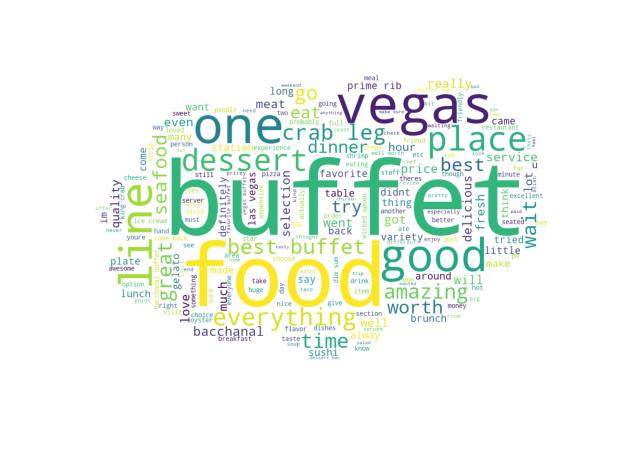

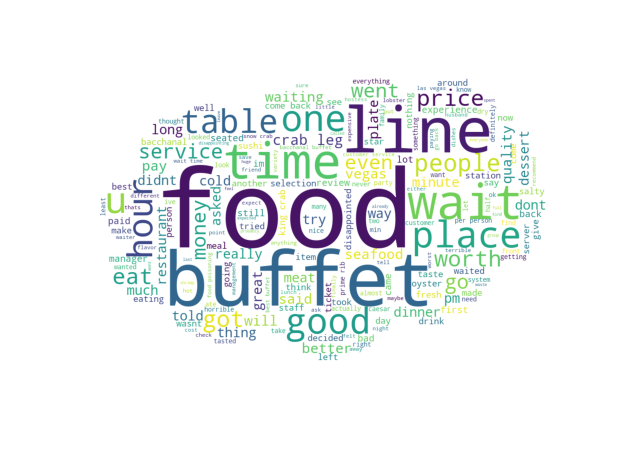

In [45]:
wc(df[df["stars"]==5].text)
wc(df[df["stars"]==1].text)

In [46]:
df["situation"]

0        positive
1        positive
2        positive
3        negative
4        positive
           ...   
10412    positive
10413    positive
10414    positive
10415    positive
10416    positive
Name: situation, Length: 10374, dtype: object

In [47]:
s={"positive":1,"negative":0}

In [48]:
df["situation"]=df["situation"].map(s)

In [49]:
df["situation"]

0        1.0
1        1.0
2        1.0
3        0.0
4        1.0
        ... 
10412    1.0
10413    1.0
10414    1.0
10415    1.0
10416    1.0
Name: situation, Length: 10374, dtype: float64

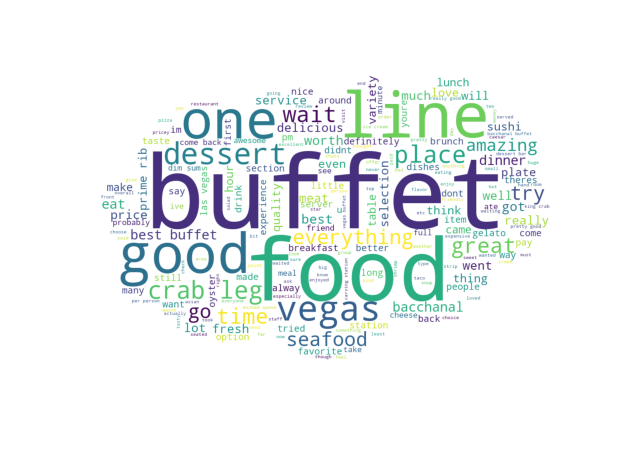

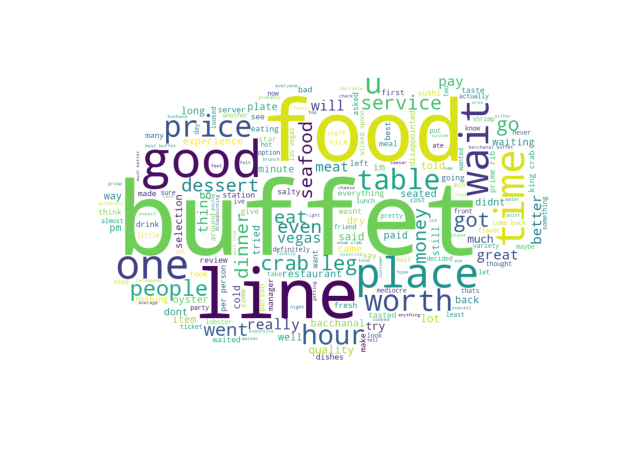

In [50]:
wc(df[df["situation"]==1].text)
wc(df[df["situation"]==0].text)